In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Считывание данных

In [2]:
train_data = pd.read_csv('train.csv')
train_data

ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  \
0          2010-06-26  27.0       66829.0        549.0     17290.0   
1          1996-09-23  55.0      172147.0        850.0     16110.0   
2          2015-01-19  51.0      300000.0        850.0     38436.0   
3          1981-05-12  25.0       34683.0        847.0     19186.0   
4          1995-05-07  55.0      300000.0        850.0     30437.0   
...               ...   ...           ...          ...         ...   
11012      2010-07-10  57.0      300000.0        850.0     14756.0   
11013      2003-10-22  28.0       15000.0        300.0     51361.0   
11014      1983-05-12  23.0       15000.0        302.0     30724.0   
11015             NaN   NaN           NaN          NaN         NaN   
11016      2000-01-07  41.0      300000.0          NaN         NaN   

       LoanDuration MaritalStatus  NumberOfDependents HomeOwnershipStatus  \
0              60.0      Divorced                 1.0                Rent   
1              36.0       Widowed                 1.0            Mortgage   
2              36.0       Married                 0.0            Mortgage   
3              48.0       Married                 0.0               Other   
4              48.0        Single                 2.0                Rent   
...             ...           ...                 ...                 ...   
11012          48.0       Married                 2.0                 Own   
11013          96.0        Single                 1.0                 Own   
11014          72.0       Married                 3.0                Rent   
11015           NaN           NaN                 NaN                 NaN   
11016          60.0        Single                 2.0                 Own   

       MonthlyDebtPayments  ...  EmploymentStatus  EducationLevel  Experience  \
0                   1095.0  ...          Employed       Associate         4.0   
1                    211.0  ...          Employed     High School        33.0   
2                    546.0  ...          Employed        Bachelor        28.0   
3                    153.0  ...          Employed     High School         0.0   
4                    562.0  ...          Employed        Bachelor        31.0   
...                    ...  ...               ...             ...         ...   
11012                620.0  ...          Employed       Associate        38.0   
11013                696.0  ...          Employed        Bachelor         5.0   
11014                413.0  ...     Self-Employed       Associate         0.0   
11015                  NaN  ...               NaN             NaN         NaN   
11016                  NaN  ...          Employed     High School        20.0   

       NetWorth  BaseInterestRate InterestRate  MonthlyLoanPayment  \
0       35067.0          0.257790     0.251465          508.970230   
1       27001.0          0.086110     0.093173          514.675859   
2      278382.0          0.108436     0.115443         1268.276385   
3        9224.0          0.100686     0.112822          498.505187   
4        4502.0          0.110437     0.089037          756.035156   
...         ...               ...          ...                 ...   
11012  167544.0          0.094756     0.106387          378.792448   
11013  116879.0          0.446361     0.401087         1793.042130   
11014  250778.0          0.404724     0.360670         1047.672294   
11015       NaN               NaN          NaN                 NaN   
11016       NaN               NaN     0.111351          513.709256   

       TotalDebtToIncomeRatio  LoanApproved  RiskScore  
0                    0.288013           0.0  66.176500  
1                    0.050585           1.0  28.495737  
2                    0.072571           1.0  34.488104  
3                    0.225415           1.0  36.910753  
4                    0.052721           1.0  31.347091  
...                       ...           ...        ...  
11012                0.0399

## Предбработка данных
#### Для начала посмотрим: есть ли совсем пустые строки, которые не несут никакой важной информации

In [3]:
train_data[train_data.isna().all(axis=1)]

ApplicationDate  Age  AnnualIncome  CreditScore  LoanAmount  \
10000             NaN  NaN           NaN          NaN         NaN   
10001             NaN  NaN           NaN          NaN         NaN   
10002             NaN  NaN           NaN          NaN         NaN   
10003             NaN  NaN           NaN          NaN         NaN   
10004             NaN  NaN           NaN          NaN         NaN   
...               ...  ...           ...          ...         ...   
10880             NaN  NaN           NaN          NaN         NaN   
10909             NaN  NaN           NaN          NaN         NaN   
10921             NaN  NaN           NaN          NaN         NaN   
10979             NaN  NaN           NaN          NaN         NaN   
11015             NaN  NaN           NaN          NaN         NaN   

       LoanDuration MaritalStatus  NumberOfDependents HomeOwnershipStatus  \
10000           NaN           NaN                 NaN                 NaN   
10001           NaN           NaN                 NaN                 NaN   
10002           NaN           NaN                 NaN                 NaN   
10003           NaN           NaN                 NaN                 NaN   
10004           NaN           NaN                 NaN                 NaN   
...             ...           ...                 ...                 ...   
10880           NaN           NaN                 NaN                 NaN   
10909           NaN           NaN                 NaN                 NaN   
10921           NaN           NaN                 NaN                 NaN   
10979           NaN           NaN                 NaN                 NaN   
11015           NaN           NaN                 NaN                 NaN   

       MonthlyDebtPayments  ...  EmploymentStatus  EducationLevel  Experience  \
10000                  NaN  ...               NaN             NaN         NaN   
10001                  NaN  ...               NaN             NaN         NaN   
10002                  NaN  ...               NaN             NaN         NaN   
10003                  NaN  ...               NaN             NaN         NaN   
10004                  NaN  ...               NaN             NaN         NaN   
...                    ...  ...               ...             ...         ...   
10880                  NaN  ...               NaN             NaN         NaN   
10909                  NaN  ...               NaN             NaN         NaN   
10921                  NaN  ...               NaN             NaN         NaN   
10979                  NaN  ...               NaN             NaN         NaN   
11015                  NaN  ...               NaN             NaN         NaN   

       NetWorth  BaseInterestRate InterestRate  MonthlyLoanPayment  \
10000       NaN               NaN          NaN                 NaN   
10001       NaN               NaN          NaN                 NaN   
10002       NaN               NaN          NaN                 NaN   
10003       NaN               NaN          NaN                 NaN   
10004       NaN               NaN          NaN                 NaN   
...         ...               ...          ...                 ...   
10880       NaN               NaN          NaN                 NaN   
10909       NaN               NaN          NaN                 NaN   
10921       NaN               NaN          NaN                 NaN   
10979       NaN               NaN          NaN                 NaN   
11015       NaN               NaN          NaN                 NaN   

       TotalDebtToIncomeRatio  LoanApproved  RiskScore  
10000                     NaN           NaN        NaN  
10001                     NaN           NaN        NaN  
10002                     NaN           NaN        NaN  
10003                     NaN           NaN        NaN  
10004                     NaN           NaN        NaN  
...                       ...           ...        ...  
10880                     NaN          

#### Как оказалось - есть, поэтому удалим их в нижнем блоке кода

In [4]:
train_data.dropna(how = 'all', axis=1, inplace=True)
train_data[train_data.isna().all(axis = 1)]

ApplicationDate  Age  AnnualIncome  CreditScore  LoanAmount  \
10000             NaN  NaN           NaN          NaN         NaN   
10001             NaN  NaN           NaN          NaN         NaN   
10002             NaN  NaN           NaN          NaN         NaN   
10003             NaN  NaN           NaN          NaN         NaN   
10004             NaN  NaN           NaN          NaN         NaN   
...               ...  ...           ...          ...         ...   
10880             NaN  NaN           NaN          NaN         NaN   
10909             NaN  NaN           NaN          NaN         NaN   
10921             NaN  NaN           NaN          NaN         NaN   
10979             NaN  NaN           NaN          NaN         NaN   
11015             NaN  NaN           NaN          NaN         NaN   

       LoanDuration MaritalStatus  NumberOfDependents HomeOwnershipStatus  \
10000           NaN           NaN                 NaN                 NaN   
10001           NaN           NaN                 NaN                 NaN   
10002           NaN           NaN                 NaN                 NaN   
10003           NaN           NaN                 NaN                 NaN   
10004           NaN           NaN                 NaN                 NaN   
...             ...           ...                 ...                 ...   
10880           NaN           NaN                 NaN                 NaN   
10909           NaN           NaN                 NaN                 NaN   
10921           NaN           NaN                 NaN                 NaN   
10979           NaN           NaN                 NaN                 NaN   
11015           NaN           NaN                 NaN                 NaN   

       MonthlyDebtPayments  ...  EmploymentStatus  EducationLevel  Experience  \
10000                  NaN  ...               NaN             NaN         NaN   
10001                  NaN  ...               NaN             NaN         NaN   
10002                  NaN  ...               NaN             NaN         NaN   
10003                  NaN  ...               NaN             NaN         NaN   
10004                  NaN  ...               NaN             NaN         NaN   
...                    ...  ...               ...             ...         ...   
10880                  NaN  ...               NaN             NaN         NaN   
10909                  NaN  ...               NaN             NaN         NaN   
10921                  NaN  ...               NaN             NaN         NaN   
10979                  NaN  ...               NaN             NaN         NaN   
11015                  NaN  ...               NaN             NaN         NaN   

       NetWorth  BaseInterestRate InterestRate  MonthlyLoanPayment  \
10000       NaN               NaN          NaN                 NaN   
10001       NaN               NaN          NaN                 NaN   
10002       NaN               NaN          NaN                 NaN   
10003       NaN               NaN          NaN                 NaN   
10004       NaN               NaN          NaN                 NaN   
...         ...               ...          ...                 ...   
10880       NaN               NaN          NaN                 NaN   
10909       NaN               NaN          NaN                 NaN   
10921       NaN               NaN          NaN                 NaN   
10979       NaN               NaN          NaN                 NaN   
11015       NaN               NaN          NaN                 NaN   

       TotalDebtToIncomeRatio  LoanApproved  RiskScore  
10000                     NaN           NaN        NaN  
10001                     NaN           NaN        NaN  
10002                     NaN           NaN        NaN  
10003                     NaN           NaN        NaN  
10004                     NaN           NaN        NaN  
...                       ...           ...        ...  
10880                     NaN          

### Анализ целевой переменной
##### С помощью boxplot визуально определим - есть ли выбросы у целевой переменной

<Axes: ylabel='RiskScore'>

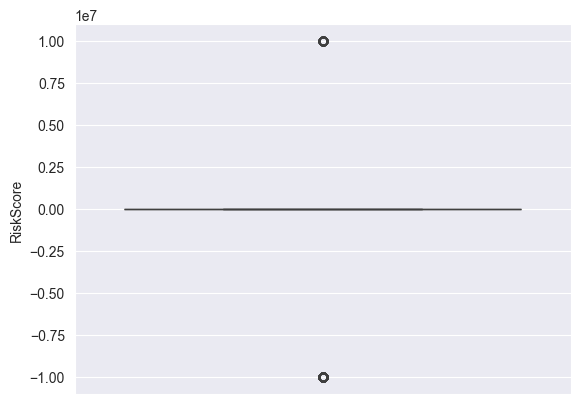

In [5]:
sns.boxplot(train_data['RiskScore'])

как видно из графика, есть два значения, которые очень сильно выделяются на фоне распределения значений
найти сами значения выбросов можно с помощью метода IQR  
#### IQR
##### IQR - Мера разброса данных, равная разнице между третьим Q3 и первым Q1 квартилями. Выбросы лежат за пределами [Q1 - 1.5*IQR; Q3 + 1.5 * IQR]

In [6]:
Q1 = np.percentile(train_data['RiskScore'], 25)
Q2 = np.percentile(train_data['RiskScore'], 75)

IQR = Q2 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

outliers = train_data[(train_data['RiskScore'] < lower_bound) | (train_data['RiskScore'] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")
print(outliers['RiskScore'].unique())

Количество выбросов: 0
[]


<Axes: ylabel='RiskScore'>

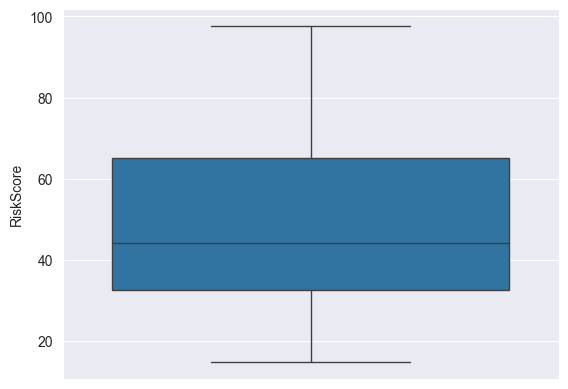

In [7]:
train_data = train_data[(train_data['RiskScore'] != -9999999.) & (train_data['RiskScore'] != 10000000.)]
sns.boxplot(train_data['RiskScore'])

### Обработка пропусков остальных признаков
Для заполнения пропусков нужно определиться какого рода совершен пропуск и как его обрабатывать. В этом датасете пропуски полностью случайны, поэтому категориальные признаки заполним самым частовстречаемым значением, а пропуски в скалярных признаках заполнит **KNNImputer()**
#### KNN Imputer
Работает по принципу K-nearest neighbours: для каждого объекта с пропущенным значеним считаются расстояния до всех объектов без текщего столбца с пропущенным значенем до каждого объекта из набора данных
Данные расстояния сортируются по возрастанию, выделяются первые k, из которых считается среднее значение столбца с пропущенным значением


In [8]:
train_data.drop("ApplicationDate", axis = 1, inplace=True) # Удлим ненужный признак, потому что нас не интересует в какой день клиент взял кредит
train_data

C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\2371284557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop("ApplicationDate", axis = 1, inplace=True) # Удлим ненужный признак, потому что нас не интересует в какой день клиент взял кредит


Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      27.0       66829.0        549.0     17290.0          60.0   
1      55.0      172147.0        850.0     16110.0          36.0   
2      51.0      300000.0        850.0     38436.0          36.0   
3      25.0       34683.0        847.0     19186.0          48.0   
4      55.0      300000.0        850.0     30437.0          48.0   
...     ...           ...          ...         ...           ...   
11012  57.0      300000.0        850.0     14756.0          48.0   
11013  28.0       15000.0        300.0     51361.0          96.0   
11014  23.0       15000.0        302.0     30724.0          72.0   
11015   NaN           NaN          NaN         NaN           NaN   
11016  41.0      300000.0          NaN         NaN          60.0   

      MaritalStatus  NumberOfDependents HomeOwnershipStatus  \
0          Divorced                 1.0                Rent   
1           Widowed                 1.0            Mortgage   
2           Married                 0.0            Mortgage   
3           Married                 0.0               Other   
4            Single                 2.0                Rent   
...             ...                 ...                 ...   
11012       Married                 2.0                 Own   
11013        Single                 1.0                 Own   
11014       Married                 3.0                Rent   
11015           NaN                 NaN                 NaN   
11016        Single                 2.0                 Own   

       MonthlyDebtPayments  CreditCardUtilizationRate  ...  EmploymentStatus  \
0                   1095.0                   0.151985  ...          Employed   
1                    211.0                   0.175693  ...          Employed   
2                    546.0                   0.444605  ...          Employed   
3                    153.0                   0.188452  ...          Employed   
4                    562.0                   0.273431  ...          Employed   
...                    ...                        ...  ...               ...   
11012                620.0                   0.477742  ...          Employed   
11013                696.0                   0.322554  ...          Employed   
11014                413.0                   0.497062  ...     Self-Employed   
11015                  NaN                        NaN  ...               NaN   
11016                  NaN                   0.273345  ...          Employed   

       EducationLevel  Experience  NetWorth BaseInterestRate  InterestRate  \
0           Associate         4.0   35067.0         0.257790      0.251465   
1         High School        33.0   27001.0         0.086110      0.093173   
2            Bachelor        28.0  278382.0         0.108436      0.115443   
3         High School         0.0    9224.0         0.100686      0.112822   
4            Bachelor        31.0    4502.0         0.110437      0.089037   
...               ...         ...       ...              ...           ...   
11012       Associate        38.0  167544.0         0.094756      0.106387   
11013        Bachelor         5.0  116879.0         0.446361      0.401087   
11014       Associate         0.0  250778.0         0.404724      0.360670   
11015             NaN         NaN       NaN              NaN           NaN   
11016     High School        20.0       NaN              NaN      0.111351   

       MonthlyLoanPayment  TotalDebtToIncomeRatio  LoanApproved  RiskScore  
0              508.970230                0.288013           0.0  66.176500  
1              514.675859                0.050585           1.0  28.495737  
2             1268.276385                0.072571           1.0  34.488104  
3              498.505187                0.225415           1.0  36.910753  
4              756.035156                0.052721           1.0  31.347091  
...                   ...                     ...           ...        ...

#### Выделение скалярных и категориальных признаков

In [9]:
num_cols = train_data.select_dtypes(exclude='object').columns.tolist()
categorical_cols = train_data.select_dtypes(include='object').columns.to_list()

print(f"Скалярные признаки {num_cols}")
print(f"Признаки, подлежащие кодированию{categorical_cols}")

Скалярные признаки ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Признаки, подлежащие кодированию['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']


In [10]:
train_data = train_data[train_data['RiskScore'].isna() == False]
train_data

Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      27.0       66829.0        549.0     17290.0          60.0   
1      55.0      172147.0        850.0     16110.0          36.0   
2      51.0      300000.0        850.0     38436.0          36.0   
3      25.0       34683.0        847.0     19186.0          48.0   
4      55.0      300000.0        850.0     30437.0          48.0   
...     ...           ...          ...         ...           ...   
11011  39.0      300000.0        850.0      7721.0          72.0   
11012  57.0      300000.0        850.0     14756.0          48.0   
11013  28.0       15000.0        300.0     51361.0          96.0   
11014  23.0       15000.0        302.0     30724.0          72.0   
11016  41.0      300000.0          NaN         NaN          60.0   

      MaritalStatus  NumberOfDependents HomeOwnershipStatus  \
0          Divorced                 1.0                Rent   
1           Widowed                 1.0            Mortgage   
2           Married                 0.0            Mortgage   
3           Married                 0.0               Other   
4            Single                 2.0                Rent   
...             ...                 ...                 ...   
11011      Divorced                 5.0                 Own   
11012       Married                 2.0                 Own   
11013        Single                 1.0                 Own   
11014       Married                 3.0                Rent   
11016        Single                 2.0                 Own   

       MonthlyDebtPayments  CreditCardUtilizationRate  ...  EmploymentStatus  \
0                   1095.0                   0.151985  ...          Employed   
1                    211.0                   0.175693  ...          Employed   
2                    546.0                   0.444605  ...          Employed   
3                    153.0                   0.188452  ...          Employed   
4                    562.0                   0.273431  ...          Employed   
...                    ...                        ...  ...               ...   
11011                276.0                   0.215136  ...          Employed   
11012                620.0                   0.477742  ...          Employed   
11013                696.0                   0.322554  ...          Employed   
11014                413.0                   0.497062  ...     Self-Employed   
11016                  NaN                   0.273345  ...          Employed   

       EducationLevel  Experience  NetWorth BaseInterestRate  InterestRate  \
0           Associate         4.0   35067.0         0.257790      0.251465   
1         High School        33.0   27001.0         0.086110      0.093173   
2            Bachelor        28.0  278382.0         0.108436      0.115443   
3         High School         0.0    9224.0         0.100686      0.112822   
4            Bachelor        31.0    4502.0         0.110437      0.089037   
...               ...         ...       ...              ...           ...   
11011       Associate        16.0   18607.0         0.107721      0.108596   
11012       Associate        38.0  167544.0         0.094756      0.106387   
11013        Bachelor         5.0  116879.0         0.446361      0.401087   
11014       Associate         0.0  250778.0         0.404724      0.360670   
11016     High School        20.0       NaN              NaN      0.111351   

       MonthlyLoanPayment  TotalDebtToIncomeRatio  LoanApproved  RiskScore  
0              508.970230                0.288013           0.0  66.176500  
1              514.675859                0.050585           1.0  28.495737  
2             1268.276385                0.072571           1.0  34.488104  
3              498.505187                0.225415           1.0  36.910753  
4              756.035156                0.052721           1.0  31.347091  
...                   ...                     ...           ...        ...

In [11]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
train_data[num_cols[:-1]] = imputer.fit_transform(train_data[num_cols[:-1]])
train_data[num_cols[:-1]].isna().sum()

C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\1102897865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[num_cols[:-1]] = imputer.fit_transform(train_data[num_cols[:-1]])


Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
NumberOfDependents            0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
dtype: int64

In [12]:
for feature in categorical_cols:
    most_frequent_value = train_data[feature].mode()[0] # как было описано раннее - категориальные признаки заполняются самым частовстречаемым значением, что соответствует моде в статистике
    train_data[feature].fillna(most_frequent_value, inplace=True)
    
train_data[categorical_cols].isna().sum()

C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\4154733675.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[feature].fillna(most_frequent_value, inplace=True)
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\4154733675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[feature].fillna(most_frequent_value, inplace=T

MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

#### Кодирование категориальных признаков
Модель линейной регрессии не способна самостоятельно обрабатывать категориальные признаки, как, например, CatBoost, поэтому мы сами ответсвенны за их обработку

Есть множество способов обработки категориальных признаков: **LabelEncoding**, **One-hot Encoding**, **Frequency Encoding**, **Binary encoding** - все они имеют свои плюсы и минусы, но в данной лабораторной работе воспользуемся One-hot encoding, чтобы видеть вклад каждого отдельного закодированного элемента по весу в модели.

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

oh_encoded = encoder.fit_transform(train_data[categorical_cols])
oh_encoded_df = pd.DataFrame(oh_encoded, columns = encoder.get_feature_names_out(categorical_cols))
oh_encoded_df

MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                         1.0                    0.0                   0.0   
1                         0.0                    0.0                   0.0   
2                         0.0                    1.0                   0.0   
3                         0.0                    1.0                   0.0   
4                         0.0                    0.0                   1.0   
...                       ...                    ...                   ...   
10267                     1.0                    0.0                   0.0   
10268                     0.0                    1.0                   0.0   
10269                     0.0                    0.0                   1.0   
10270                     0.0                    1.0                   0.0   
10271                     0.0                    0.0                   1.0   

       MaritalStatus_Widowed  HomeOwnershipStatus_Mortgage  \
0                        0.0                           0.0   
1                        1.0                           1.0   
2                        0.0                           1.0   
3                        0.0                           0.0   
4                        0.0                           0.0   
...                      ...                           ...   
10267                    0.0                           0.0   
10268                    0.0                           0.0   
10269                    0.0                           0.0   
10270                    0.0                           0.0   
10271                    0.0                           0.0   

       HomeOwnershipStatus_Other  HomeOwnershipStatus_Own  \
0                            0.0                      0.0   
1                            0.0                      0.0   
2                            0.0                      0.0   
3                            1.0                      0.0   
4                            0.0                      0.0   
...                          ...                      ...   
10267                        0.0                      1.0   
10268                        0.0                      1.0   
10269                        0.0                      1.0   
10270                        0.0                      0.0   
10271                        0.0                      1.0   

       HomeOwnershipStatus_Rent  LoanPurpose_Auto  \
0                           1.0               0.0   
1                           0.0               0.0   
2                           0.0               0.0   
3                           0.0               0.0   
4                           1.0               0.0   
...                         ...               ...   
10267                       0.0               0.0   
10268                       0.0               0.0   
10269                       0.0               0.0   
10270                       1.0               0.0   
10271                       0.0               0.0   

       LoanPurpose_Debt Consolidation  ...  LoanPurpose_Home  \
0                                 0.0  ...               0.0   
1                                 0.0  ...               1.0   
2                                 0.0  ...               0.0   
3                                 1.0  ...               0.0   
4                                 1.0  ...               0.0   
...                               ...  ...               ...   
10267                             0.0  ...               1.0   
10268                             0.0  ...               0.0   
10269                             0.0  ...               1.0   
10270                             0.0  ...               0.0   
10271                             0.0  ...               1.0   

       LoanPurpose_Other  EmploymentStatus_Employed  \
0                    0.0                        1.0   
1                    0.0                        1.0   
2                    

### Feature Engineering
Посмотрим на распределения признаков и прологарифмируем некоторые из них, чтобы приблизить их к нормальному

C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\963328560.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\963328560.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\963328560.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\963328560.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.l

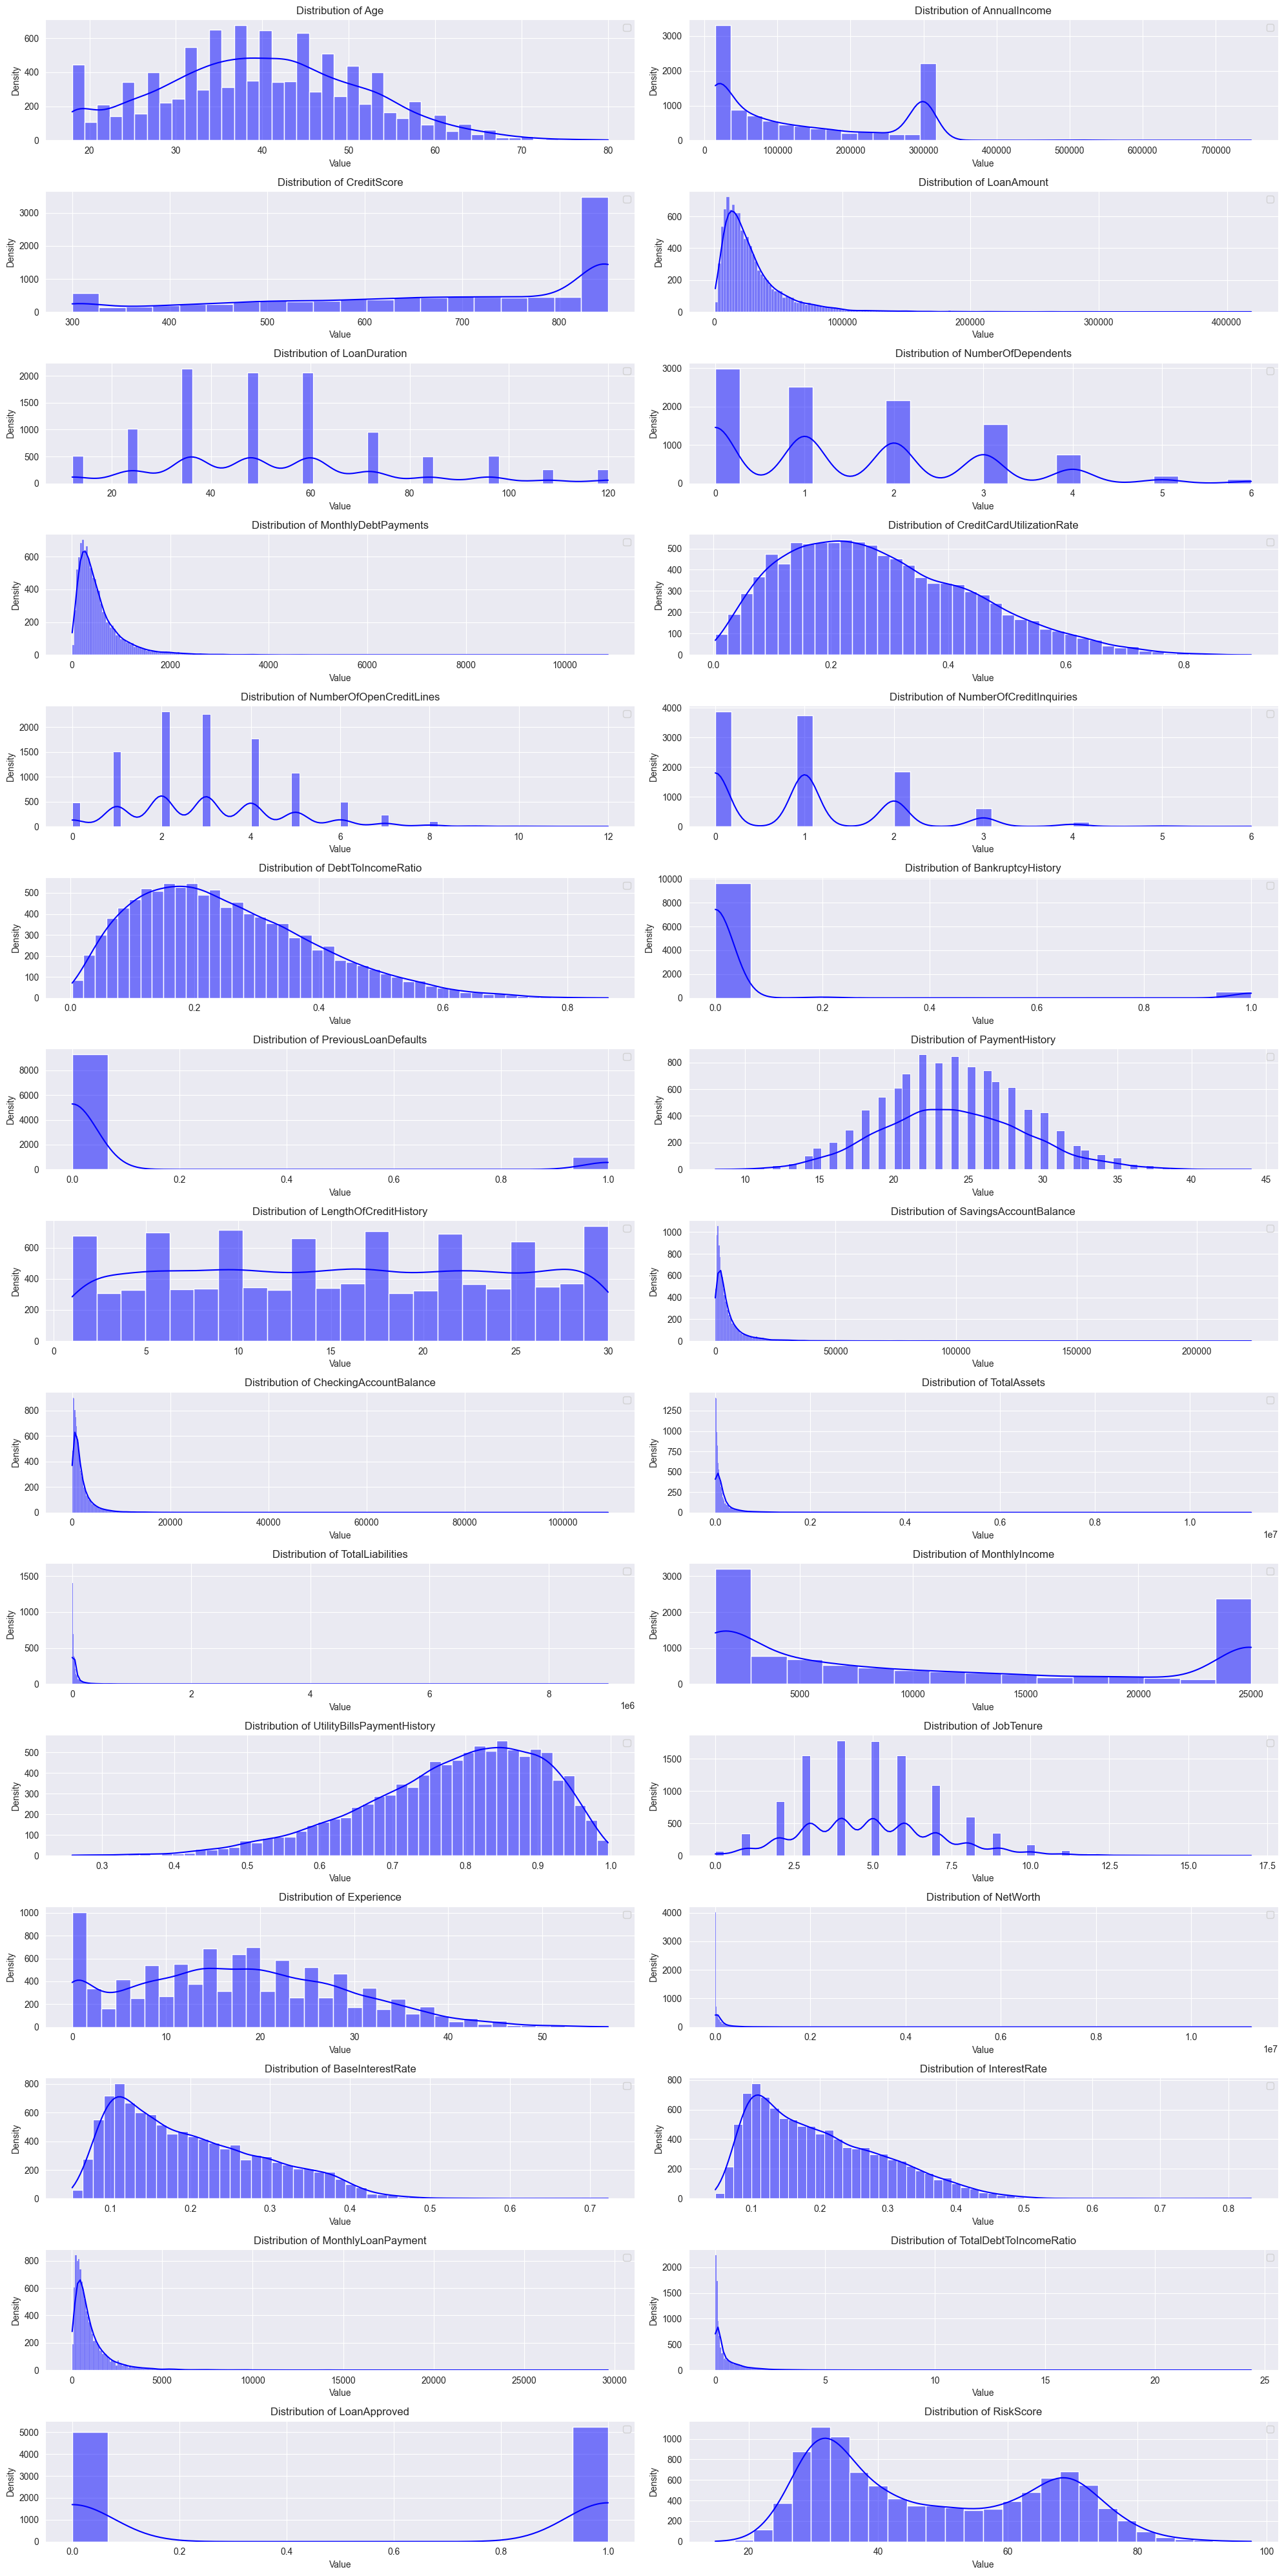

In [14]:
n_cols = 2
n_rows = (len(num_cols) // n_cols) + (1 if len(num_cols) % n_cols != 0 else 0)

plt.figure(figsize=(20, 40))

for i, feature in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    
    sns.histplot(train_data[feature], kde=True, color='blue')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

#### Возведем непрерывные  

In [15]:
log_columns = ['LoanAmount', 'MonthlyDebtPayments', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyLoanPayment']
for col in log_columns:
    train_data[col] = np.log(train_data[col])

C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\4026217436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = np.log(train_data[col])


C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\2261308994.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\2261308994.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\2261308994.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\2261308994.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  p

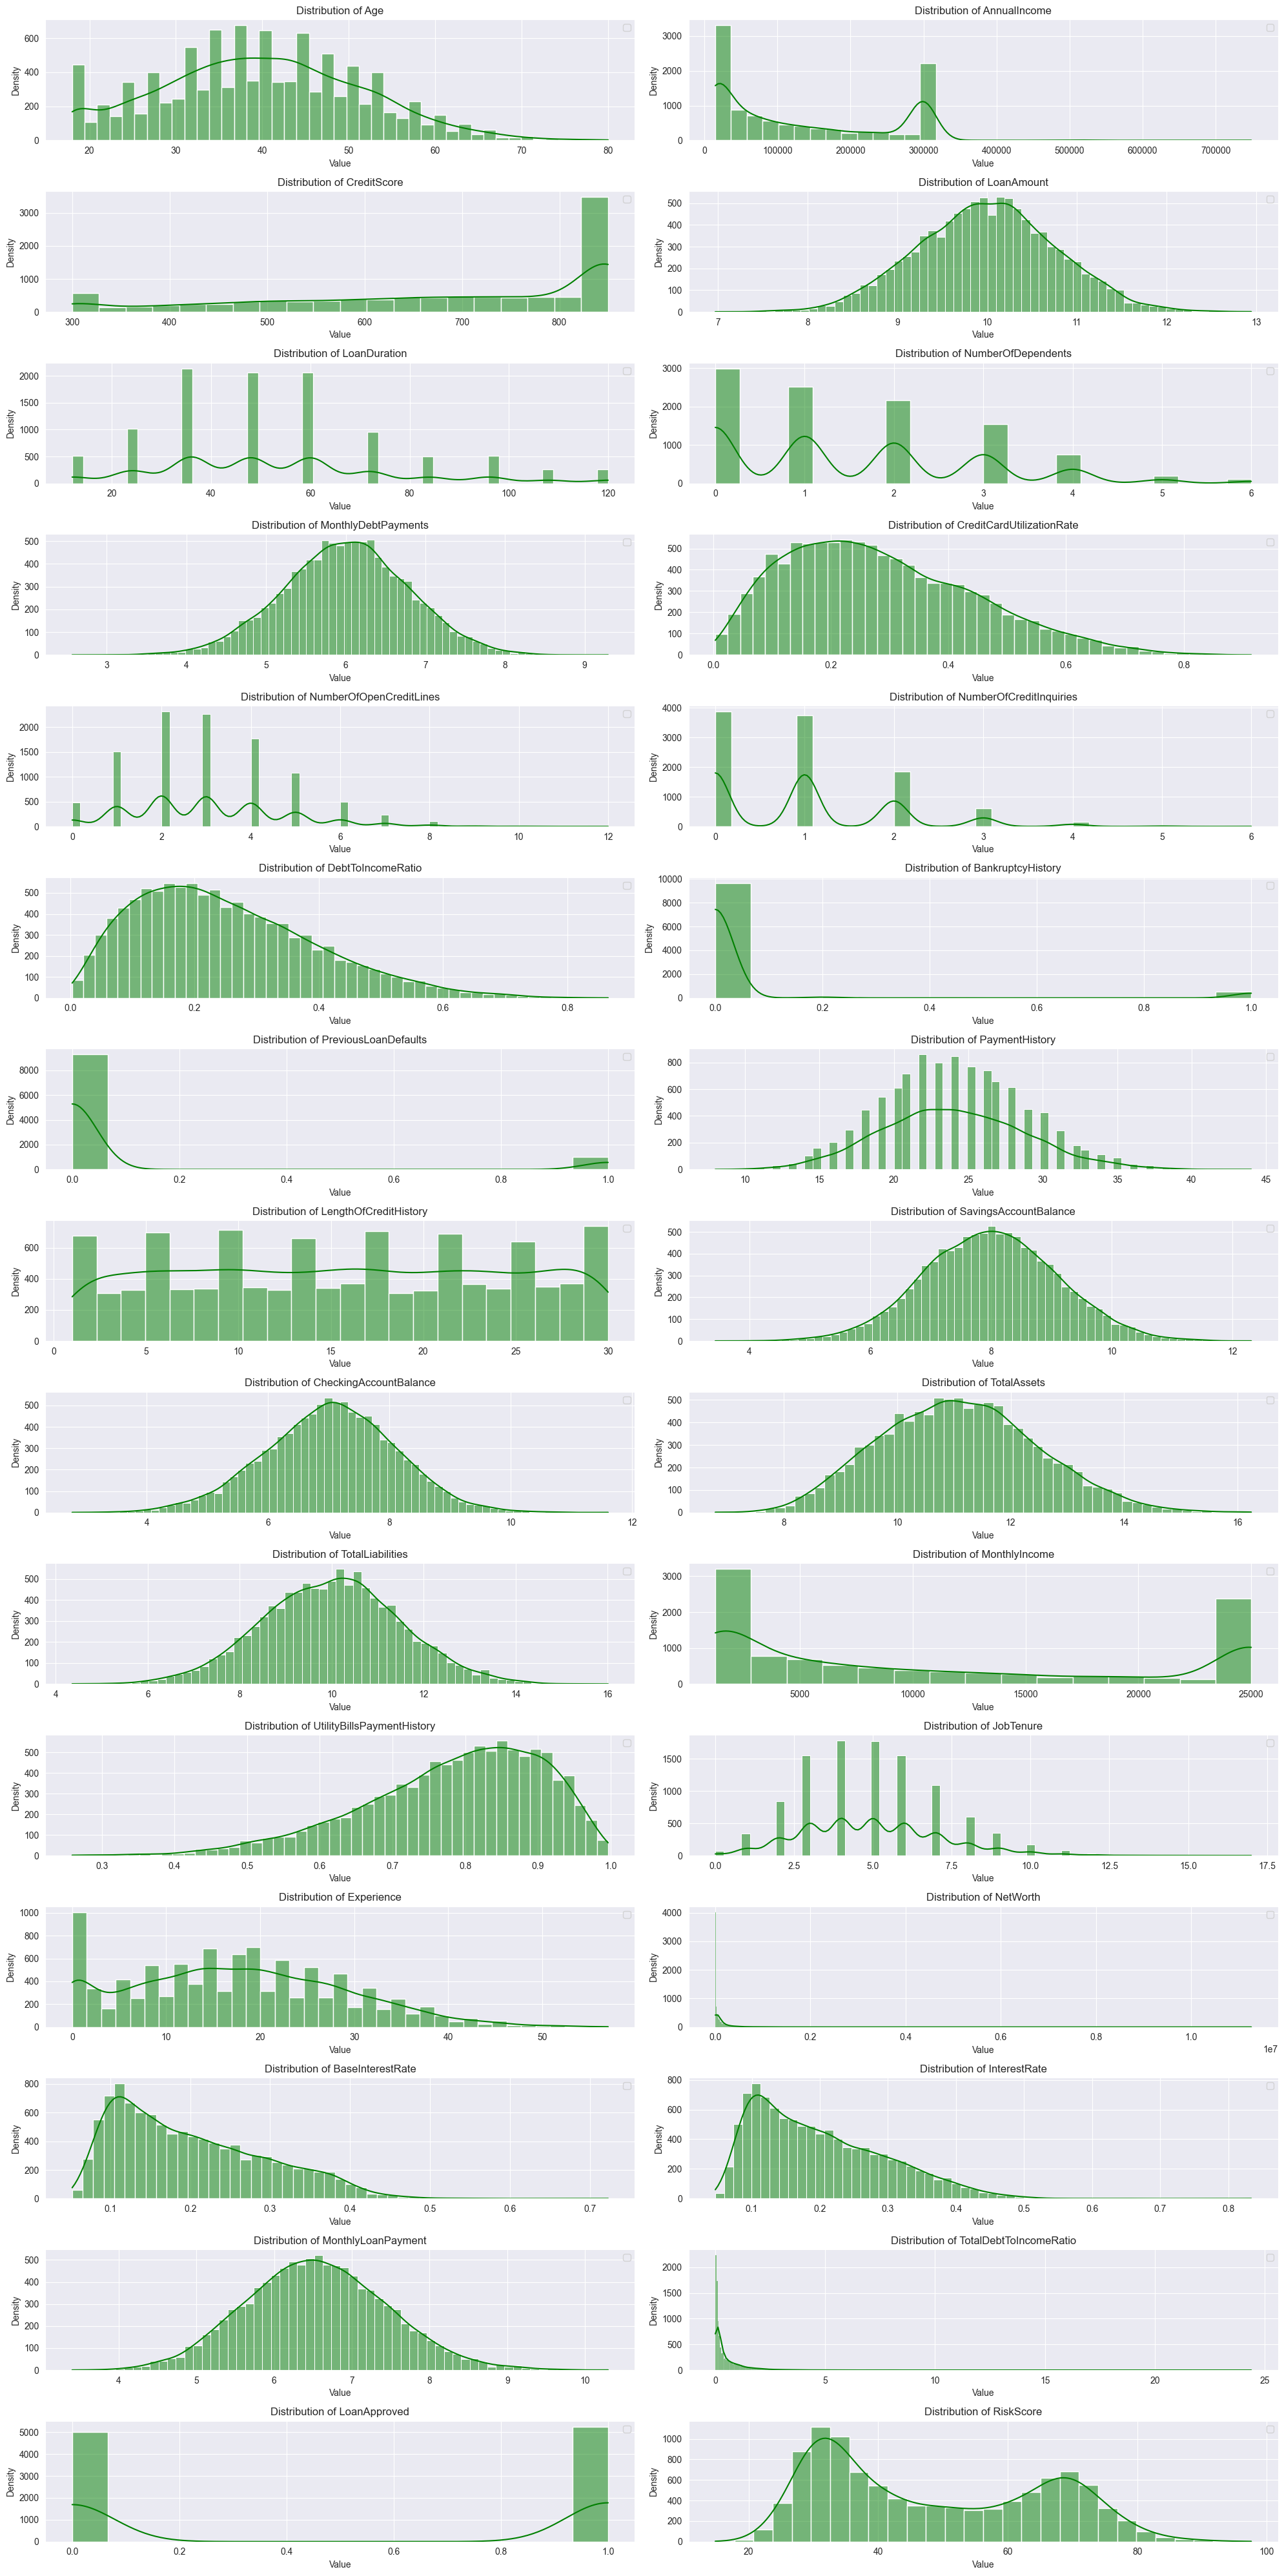

In [16]:
plt.figure(figsize=(20, 40))

for i, feature in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    
    sns.histplot(train_data[feature], kde=True, color='green')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [17]:
from my_functions import z_score
numeric_data = z_score(train_data[num_cols[:-1]])
numeric_data

A:\PyToohon\ML_O_L\ML_contests\LinearRegression\sub_dir\my_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])


Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0     -1.108451     -0.558650    -0.741546   -0.312090      0.268131   
1      1.304533      0.350659     0.986774   -0.403305     -0.710632   
2      0.959821      1.454535     0.986774    0.718761     -0.710632   
3     -1.280807     -0.836197     0.969549   -0.177821     -0.221251   
4      1.304533      1.454535     0.986774    0.417666     -0.221251   
...         ...           ...          ...         ...           ...   
11011 -0.074315      1.454535     0.986774   -1.352384      0.757512   
11012  1.476889      1.454535     0.986774   -0.516589     -0.221251   
11013 -1.022273     -1.006139    -2.171286    1.092826      1.736274   
11014 -1.453163     -1.006139    -2.159802    0.429777      0.757512   
11016  0.098041      1.454535     0.677859    1.286151      0.268131   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0               -0.400573             1.273820                  -0.831696   
1               -0.400573            -0.824384                  -0.682975   
2               -1.105987             0.387099                   1.003963   
3               -1.105987            -1.233945                  -0.602935   
4                0.304842             0.423902                  -0.069843   
...                   ...                  ...                        ...   
11011            2.421084            -0.482200                  -0.435536   
11012            0.304842             0.549054                   1.211837   
11013           -0.400573             0.696393                   0.238311   
11014            1.010256             0.031372                   1.333035   
11016            0.304842            -0.955286                  -0.070386   

       NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  MonthlyIncome  \
0                    -0.591929                 0.022255  ...      -0.560983   
1                    -0.016743                -0.989281  ...       0.373890   
2                    -0.016743                -0.989281  ...       1.508799   
3                     2.284003                -0.989281  ...      -0.846332   
4                    -0.016743                 0.022255  ...       1.508799   
...                        ...                      ...  ...            ...   
11011                -0.591929                 0.022255  ...       1.508799   
11012                -1.167115                 2.045329  ...       1.508799   
11013                -0.591929                -0.989281  ...      -1.021052   
11014                -0.591929                -0.989281  ...      -1.021052   
11016                -0.591929                 1.033792  ...       1.508799   

       UtilityBillsPaymentHistory  JobTenure  Experience  NetWorth  \
0                        1.005394  -0.432306   -1.203829 -0.261972   
1                        0.103462  -1.340227    1.355815 -0.279778   
2                        1.067638  -0.886267    0.914497  0.275158   
3                        0.746299  -0.886267   -1.556883 -0.319022   
4                        0.846062   0.021655    1.179288 -0.329446   
...                           ...        ...         ...       ...   
11011                    0.759157  -1.340227   -0.144666 -0.298309   
11012                    0.013270  -0.432306    1.797133  0.030477   
11013                   -0.377507  -0.886267   -1.115565 -0.081368   
11014                   -0.184199  -0.886267   -1.556883  0.214220   
11016                   -0.354069  -0.886267    0.208389  0.118802   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0              0.613635      0.530862           -0.350080   
1             -1.217712     -1.108086           -0.337811   
2             -0.979556     -0.877497            0.654820   
3             -1.062226     -0.904643           -0.372946   
4             -0.958211     -1.150906            0.085437   
...                 ...           ...                 ...   
11011

####  Возведем несколько непрерывных признаков в квадрат, чтобы добавить нелинейность в данные, которые модель линейной регрессии сама выявлять не может

In [18]:
for col in log_columns:
    new_col = f'{col}_squared'
    numeric_data[new_col] = numeric_data[col] ** 2

C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\881180833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data[new_col] = numeric_data[col] ** 2
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\881180833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data[new_col] = numeric_data[col] ** 2
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\881180833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

#### Объединим отдельно обработанные скалярные и категориальные признаки в один датасет


In [19]:
numeric_data.reset_index(inplace=True)
oh_encoded_df.reset_index(inplace=True)

data = pd.concat([numeric_data, oh_encoded_df, train_data['RiskScore'].reset_index()], axis=1)
data

index       Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0          0 -1.108451     -0.558650    -0.741546   -0.312090      0.268131   
1          1  1.304533      0.350659     0.986774   -0.403305     -0.710632   
2          2  0.959821      1.454535     0.986774    0.718761     -0.710632   
3          3 -1.280807     -0.836197     0.969549   -0.177821     -0.221251   
4          4  1.304533      1.454535     0.986774    0.417666     -0.221251   
...      ...       ...           ...          ...         ...           ...   
10267  11011 -0.074315      1.454535     0.986774   -1.352384      0.757512   
10268  11012  1.476889      1.454535     0.986774   -0.516589     -0.221251   
10269  11013 -1.022273     -1.006139    -2.171286    1.092826      1.736274   
10270  11014 -1.453163     -1.006139    -2.159802    0.429777      0.757512   
10271  11016  0.098041      1.454535     0.677859    1.286151      0.268131   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0               -0.400573             1.273820                  -0.831696   
1               -0.400573            -0.824384                  -0.682975   
2               -1.105987             0.387099                   1.003963   
3               -1.105987            -1.233945                  -0.602935   
4                0.304842             0.423902                  -0.069843   
...                   ...                  ...                        ...   
10267            2.421084            -0.482200                  -0.435536   
10268            0.304842             0.549054                   1.211837   
10269           -0.400573             0.696393                   0.238311   
10270            1.010256             0.031372                   1.333035   
10271            0.304842            -0.955286                  -0.070386   

       NumberOfOpenCreditLines  ...  EmploymentStatus_Employed  \
0                    -0.591929  ...                        1.0   
1                    -0.016743  ...                        1.0   
2                    -0.016743  ...                        1.0   
3                     2.284003  ...                        1.0   
4                    -0.016743  ...                        1.0   
...                        ...  ...                        ...   
10267                -0.591929  ...                        1.0   
10268                -1.167115  ...                        1.0   
10269                -0.591929  ...                        1.0   
10270                -0.591929  ...                        0.0   
10271                -0.591929  ...                        1.0   

       EmploymentStatus_Self-Employed  EmploymentStatus_Unemployed  \
0                                 0.0                          0.0   
1                                 0.0                          0.0   
2                                 0.0                          0.0   
3                                 0.0                          0.0   
4                                 0.0                          0.0   
...                               ...                          ...   
10267                             0.0                          0.0   
10268                             0.0                          0.0   
10269                             0.0                          0.0   
10270                             1.0                          0.0   
10271                             0.0                          0.0   

       EducationLevel_Associate  EducationLevel_Bachelor  \
0                           1.0                      0.0   
1                           0.0                      0.0   
2                           0.0                      1.0   
3                           0.0                      0.0   
4                           0.0                      1.0   
...                         ...                      ...   
10267                       1.0                      0.0   
10268              

### Корреляционный анализ
#### В результате корреляционного анализа были найдены сильнокоррелируемые признаки, которые могут плохо повлиять на обучение модели, а аналитическое решение и вовсе не будет найдено ввиду линейно зависимых столбцов матрицы.


#### Для решения это проблемы, оставим в каждой паре коррелируемых признаков только один

<Axes: >

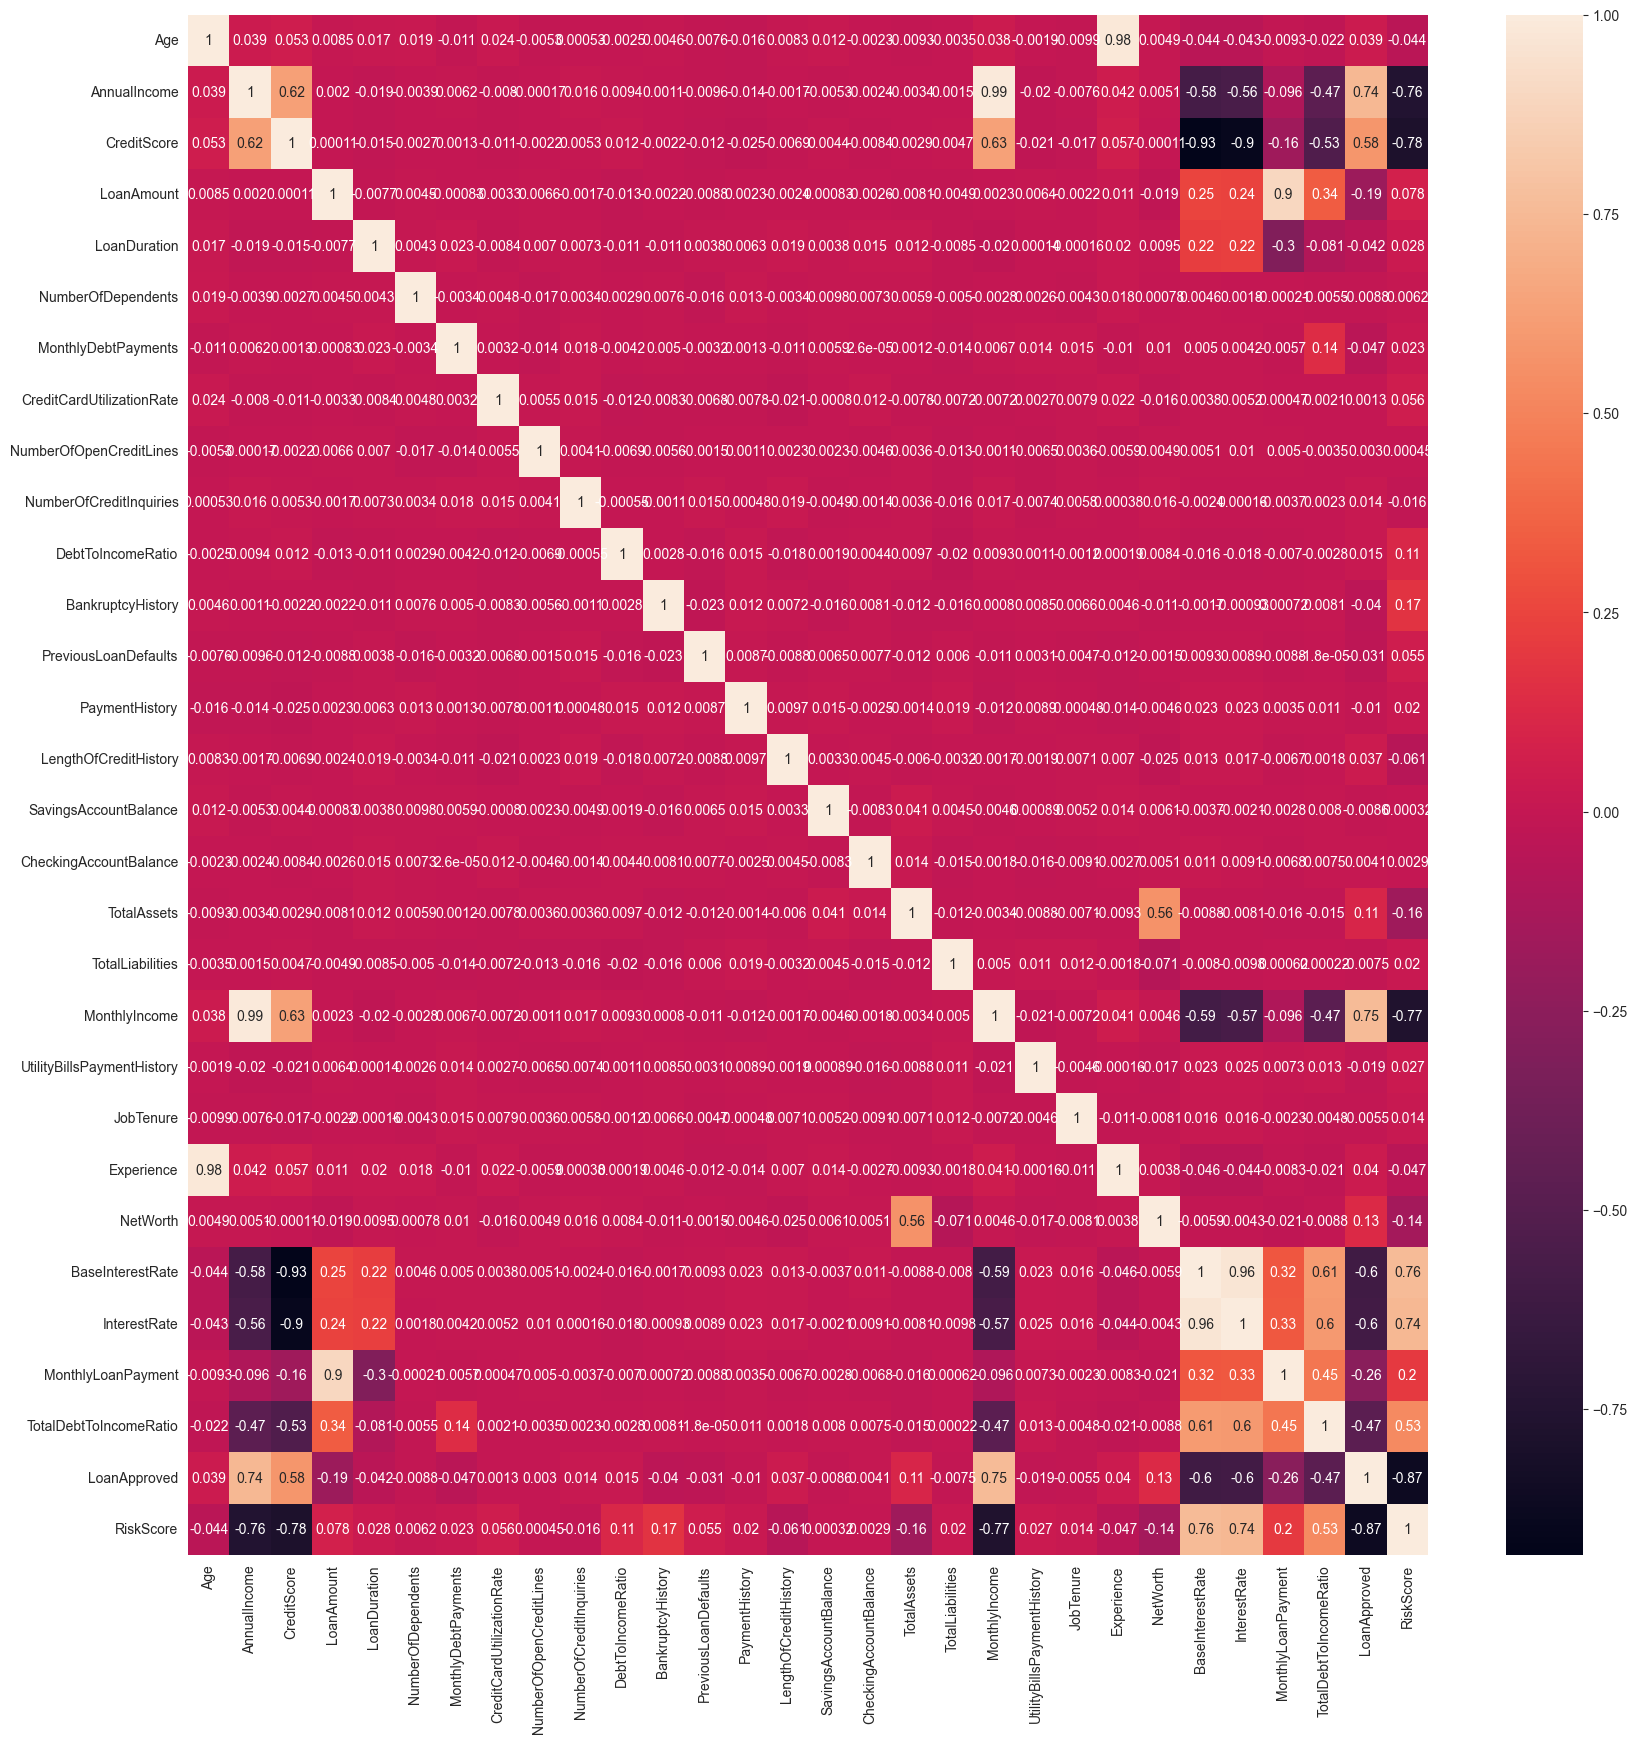

In [20]:
plt.figure(figsize=(20, 20))
correlation = data[num_cols].corr()
sns.heatmap(correlation, annot=True)

<Axes: >

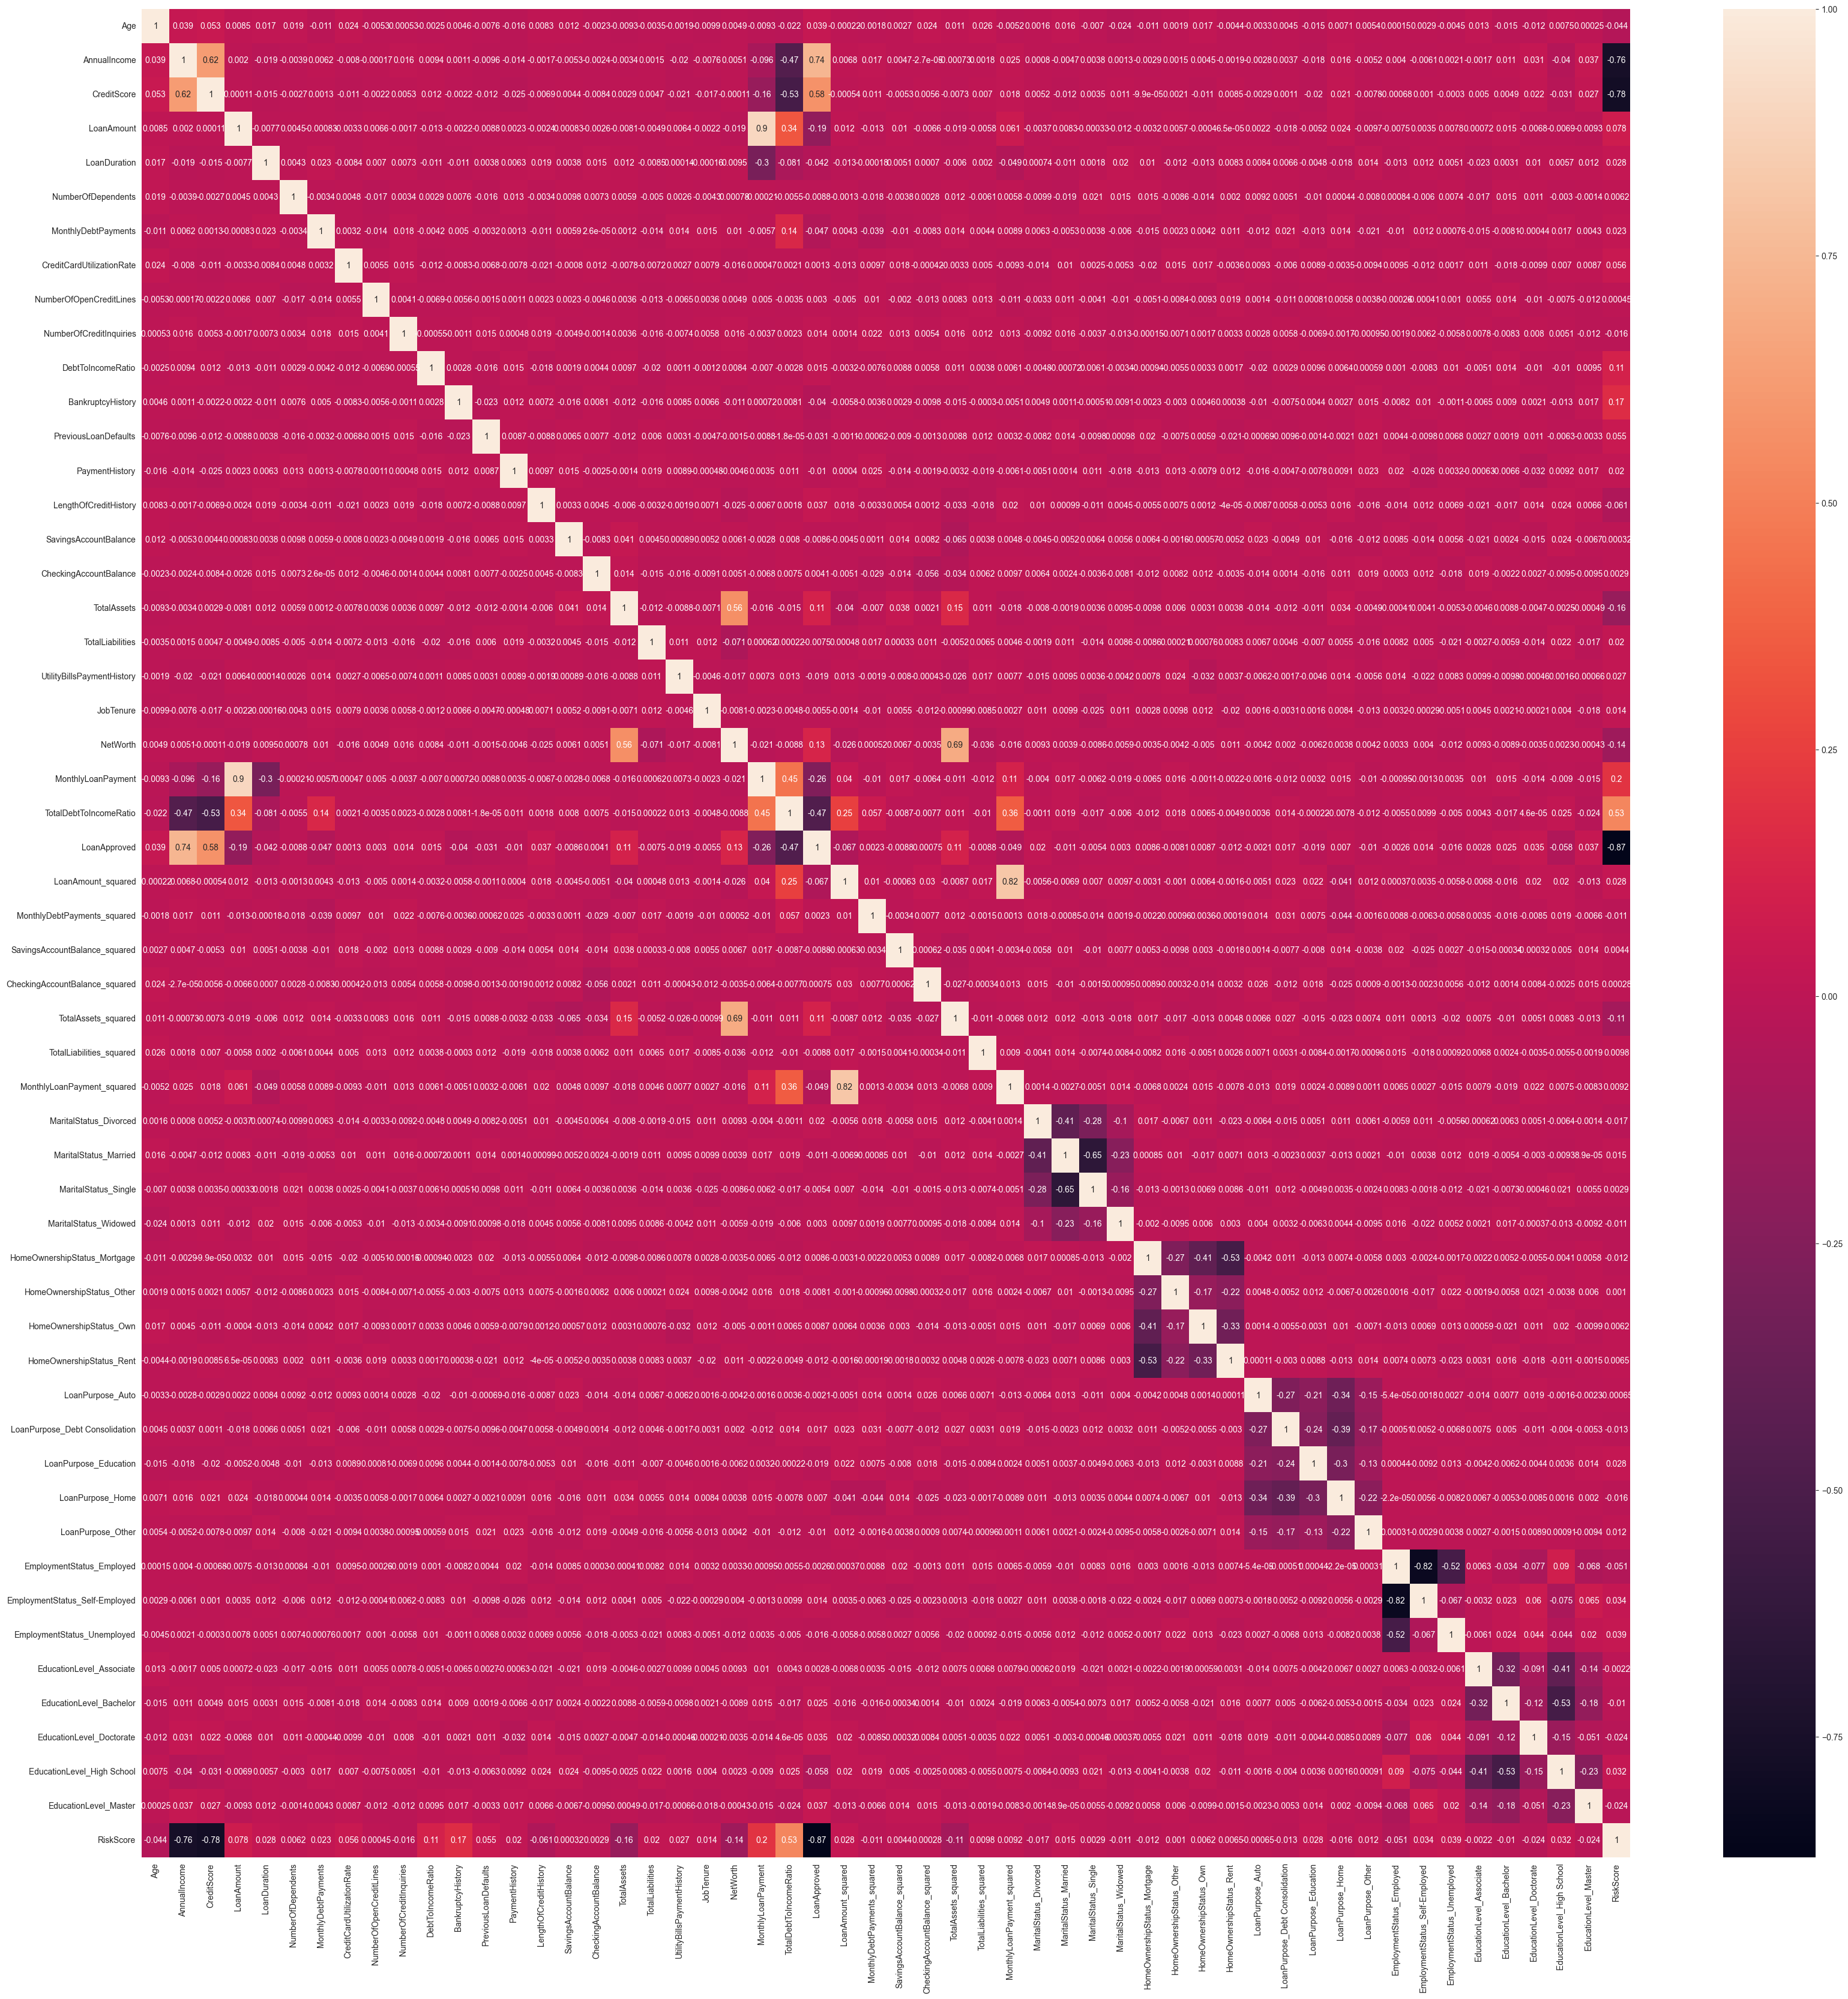

In [21]:
corr_matrix = data[:-1].corr().abs() 

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

data.drop(to_drop, axis=1, inplace=True)

non_cor_features = data.columns.to_list()


plt.figure(figsize=(40, 40))
correlation = data.corr()
sns.heatmap(correlation, annot=True)

In [22]:
data

Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0     -1.108451     -0.558650    -0.741546   -0.312090      0.268131   
1      1.304533      0.350659     0.986774   -0.403305     -0.710632   
2      0.959821      1.454535     0.986774    0.718761     -0.710632   
3     -1.280807     -0.836197     0.969549   -0.177821     -0.221251   
4      1.304533      1.454535     0.986774    0.417666     -0.221251   
...         ...           ...          ...         ...           ...   
10267 -0.074315      1.454535     0.986774   -1.352384      0.757512   
10268  1.476889      1.454535     0.986774   -0.516589     -0.221251   
10269 -1.022273     -1.006139    -2.171286    1.092826      1.736274   
10270 -1.453163     -1.006139    -2.159802    0.429777      0.757512   
10271  0.098041      1.454535     0.677859    1.286151      0.268131   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0               -0.400573             1.273820                  -0.831696   
1               -0.400573            -0.824384                  -0.682975   
2               -1.105987             0.387099                   1.003963   
3               -1.105987            -1.233945                  -0.602935   
4                0.304842             0.423902                  -0.069843   
...                   ...                  ...                        ...   
10267            2.421084            -0.482200                  -0.435536   
10268            0.304842             0.549054                   1.211837   
10269           -0.400573             0.696393                   0.238311   
10270            1.010256             0.031372                   1.333035   
10271            0.304842            -0.955286                  -0.070386   

       NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  \
0                    -0.591929                 0.022255  ...   
1                    -0.016743                -0.989281  ...   
2                    -0.016743                -0.989281  ...   
3                     2.284003                -0.989281  ...   
4                    -0.016743                 0.022255  ...   
...                        ...                      ...  ...   
10267                -0.591929                 0.022255  ...   
10268                -1.167115                 2.045329  ...   
10269                -0.591929                -0.989281  ...   
10270                -0.591929                -0.989281  ...   
10271                -0.591929                 1.033792  ...   

       LoanPurpose_Other  EmploymentStatus_Employed  \
0                    0.0                        1.0   
1                    0.0                        1.0   
2                    0.0                        1.0   
3                    0.0                        1.0   
4                    0.0                        1.0   
...                  ...                        ...   
10267                0.0                        1.0   
10268                0.0                        1.0   
10269                0.0                        1.0   
10270                0.0                        0.0   
10271                0.0                        1.0   

       EmploymentStatus_Self-Employed  EmploymentStatus_Unemployed  \
0                                 0.0                          0.0   
1                                 0.0                          0.0   
2                                 0.0                          0.0   
3                                 0.0                          0.0   
4                                 0.0                          0.0   
...                               ...                          ...   
10267                             0.0                          0.0   
10268                             0.0                          0.0   
10269                             0.0                          0.0   
10270                             1.0                          0.0   
10271                 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Реализация функций из sklearn

#### Функции нормализации, стандартизации, метрик и аналитического решения линейной регрессии вычисляются согласно формулам

In [24]:
from sklearn.utils import shuffle

def MSE(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)


def MAE(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / len(y_true)

def my_r2_score(y_true, y_pred):
    mean_model = np.mean(y_true)
    SSR = np.sum((y_pred - y_true) ** 2)
    SST = np.sum((y_true - mean_model) ** 2)
    return 1 - SSR / SST

def MAPE(y_true, y_pred):
    return np.sum(np.abs((y_true - y_pred) / y_true)) / len(y_true)

def z_score(data):
    for column in data.columns:
        data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
    return data

def min_max_norm(data):
    for column in data.column:
        data[column] = (data[column] - np.min(data[column])) / np.max(data[column] - np.min(data[column]))
    return data

class linear_regression:
    def __init__(self, l1 = 0.1, fit_intercept = True, max_iterations = 1000, mode = 'formula', learning_rate = 0.1, batch_size = 1):
        self.__weights = None
        self.__bias = 0.0
        self.__max_iters = max_iterations
        self.__l1 = l1
        self.__l2 = 1-l1
        self.__mode = mode
        self.__fit_intercept = fit_intercept
        self.__lr = learning_rate
        self.__batch_size = batch_size

    def fit(self, X, y):
        
        m_samples, n_features = X.shape

        self.__weights = np.random.randn(n_features)
        self.__bias = np.random.randn(1)

        X = np.array(X)
        y = np.array(y)


        # аналитическое решение линейной регрессии - считается по формуле, которая выводится из метода наименьших квадратов
        if self.__mode == 'formula':
            X = np.c_[np.ones((m_samples, 1)), X]
            weights = np.linalg.pinv(X.T @ X) @ X.T @ y
            self.__bias, self.__weights = weights[0], weights[1:]
        
        
        # Градиентная оптимизация - стандартный градиентный спуск. разница между SGD (Stochastic Gradient Descent) и  GD заключается 
        # в том, что Стохастический градиентный спуск меняет веса только на подмножестве данных, а не на всем как в GD  - а так идея одна
        # и та же - изменение весов в сторону анти-градиента до тех пор, пока разница между текущим значением весов и предыдущим была околонулевой - итерационный процесс 
        # Для более оптимизированных вычислении learning rate изменфяется динамически с каждой итерацией
        
        
        elif self.__mode in ['SGD', 'GD']:
            
            prev_weights = np.zeros(n_features)
            prev_bias = 0
            
            for epoch in range(self.__max_iters):
                if self.__mode == 'SGD':
                    X_shuffled, y_shuffled = shuffle(X, y)
                    
                    for i in range(0, m_samples, self.__batch_size):
                        X_batch = X_shuffled[i:i+self.__batch_size]
                        y_batch = y_shuffled[i:i+self.__batch_size]
                        
                        y_pred = X_batch @ self.__weights + self.__bias
                        error = y_pred - y_batch
                        
                        dw = X_batch.T @ error / self.__batch_size
                        db = np.sum(error) / self.__batch_size
                        
                        prev_weights = self.__weights
                        prev_bias = self.__bias
                        
                        self.__weights -= self.__lr * dw
                        self.__bias -= self.__lr * db
                        
                else:  # GD
                    y_pred = X @ self.__weights + self.__bias
                    error = y_pred - y
                    
                    dw = X.T @ error / m_samples
                    db = np.sum(error) / m_samples
                    
                    self.__weights -= self.__lr * (dw)
                    self.__bias -= self.__lr * db
                
                if np.abs(self.__weights - prev_weights).all() < 1e-6 and np.abs(self.__bias - prev_bias) < 1e-6:
                    break
                
                self.__lr *= 0.99

    def predict(self, X):
        return X @ self.__weights + (self.__bias if self.__fit_intercept else 0)
# метод __call__() для вызова вида predicted = linear_regressor(X) - для большей читаемости кода 
    def __call__(self, X):
        return self.predict(X)

In [25]:
y = data['RiskScore'] .copy()
X = data[data.columns[:-1]].copy()


X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=42)

analytic_model = linear_regression()
analytic_model.fit(X_train, y_train)
analytic_model_predicted = analytic_model(X_test)
analytic_model_predicted

8047    55.384760
7809    72.733309
3658    26.036590
318     59.932632
3014    30.828111
          ...    
8839    71.585877
5234    42.236578
400     31.336973
2960    39.615027
3481    35.352072
Length: 2055, dtype: float64

In [26]:
gradient_descent_model = linear_regression(mode = 'GD')
gradient_descent_model.fit(X_train, y_train)
gradient_descent_model_predicted = gradient_descent_model(X_test)

In [27]:
SGD_linear_model = linear_regression(mode = 'SGD', batch_size=32)
SGD_linear_model.fit(X_train, y_train)
SGD_predicted = SGD_linear_model(X_test)

In [28]:
from my_functions import MSE, MAE, my_r2_score, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,mean_absolute_percentage_error

In [29]:
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_test, y_test)
LR_predictions = LinearRegressor.predict(X_test)
LR_predictions

array([55.28781149, 74.90689992, 26.46914709, ..., 31.57541416,
       40.38085815, 34.13564449])

### Валидация моделей
#### Воспользуемся всеми метриками, которые реализовали в рамках лабораторной работы и сравним с реализацией из sklearn


In [30]:
functions = [(MSE, mean_squared_error), (MAE, mean_absolute_error), (MAPE, mean_absolute_percentage_error), (my_r2_score, r2_score)]
names = ['MSE', 'MAE', 'MAPE' ,'r2_score']

def create_metrics_dataframe(pred_data):
        
    metrics_compare = {}
    
    for i, (my_func, sklearn_func) in enumerate(functions):
        my_func_result = my_func(y_test ,pred_data)
        sklearn_func_result = sklearn_func(y_test, pred_data)
        metrics_compare[names[i]] = [round(my_func_result, 2), round(sklearn_func_result, 2)]

    results = pd.DataFrame(metrics_compare, index=['my_functions', 'sklearn_functions'] , columns = names)
    return results

In [31]:
LR_results = create_metrics_dataframe(LR_predictions)
LR_results

MSE   MAE  MAPE  r2_score
my_functions       17.42  3.22  0.07      0.94
sklearn_functions  17.42  3.22  0.07      0.94

In [32]:
analytic_model_results = create_metrics_dataframe(analytic_model_predicted)
analytic_model_results

MSE   MAE  MAPE  r2_score
my_functions       17.85  3.25  0.07      0.94
sklearn_functions  17.85  3.25  0.07      0.94

In [33]:
GD_results = create_metrics_dataframe(gradient_descent_model_predicted)
GD_results

MSE   MAE  MAPE  r2_score
my_functions       23.16  3.74  0.08      0.92
sklearn_functions  23.16  3.74  0.08      0.92

In [34]:
SGD_results = create_metrics_dataframe(SGD_predicted)
SGD_results

MSE   MAE  MAPE  r2_score
my_functions       22.97  3.73  0.08      0.92
sklearn_functions  22.97  3.73  0.08      0.92

### Вывод
Собственная реализация линейной регрессии чуть-чуть уступает реализации линейной регрессии из sklearn. Результат на валидационной 
выборке градиентной оптимизации хуже, но радует, что алгоритмы сошлись, а для достижения лучшей метрики стоит настроить начальный lr с 
помощью **GridSearch**. Все алгоритмы показали r2_score > 0.9

Собственные метрики и метрики из sklearn выдают одинаковый результат 

## Тестирование модели
#### Совершим аналогичную предобработку данных для тестового датасета и отправим предсказание модели в соревнование

In [35]:
test_data = pd.read_csv('test.csv', index_col='ID')
test_data

ApplicationDate  Age  AnnualIncome  CreditScore  LoanAmount  \
ID                                                                 
0         1979-01-03   49        207095          850       14458   
1         2006-04-10   28         64653          674       65491   
2         2013-11-28   41        300000          768       16811   
3         1995-08-24   50        300000          850       48737   
4         1980-06-15   35        300000          672       51916   
...              ...  ...           ...          ...         ...   
4995      1993-03-19   40        300000          850       12696   
4996      2015-09-27   39         75014          572       49380   
4997      1993-10-04   43         15000          454       32810   
4998      1981-05-10   53         98467          850       28446   
4999      1998-11-27   49         15000          300      395083   

      LoanDuration MaritalStatus  NumberOfDependents HomeOwnershipStatus  \
ID                                                                         
0               60        Single                   0                Rent   
1               48        Single                   2                 Own   
2               60        Single                   1                 Own   
3               36      Divorced                   0            Mortgage   
4               60        Single                   6            Mortgage   
...            ...           ...                 ...                 ...   
4995            60       Married                   1               Other   
4996            48       Married                   0            Mortgage   
4997            72      Divorced                   1               Other   
4998            96        Single                   1                 Own   
4999           108        Single                   4                 Own   

      MonthlyDebtPayments  ...  JobTenure  EmploymentStatus  EducationLevel  \
ID                         ...                                                
0                     376  ...          6          Employed     High School   
1                     238  ...          3          Employed     High School   
2                     469  ...          3          Employed     High School   
3                     567  ...          3     Self-Employed        Bachelor   
4                     106  ...          7          Employed       Associate   
...                   ...  ...        ...               ...             ...   
4995                  434  ...          3     Self-Employed          Master   
4996                   97  ...          3          Employed          Master   
4997                  289  ...          6          Employed        Bachelor   
4998                  213  ...          6     Self-Employed     High School   
4999                  291  ...          6          Employed     High School   

      Experience  NetWorth BaseInterestRate  InterestRate  MonthlyLoanPayment  \
ID                                                                              
0             23     10626         0.104458      0.125350          325.532336   
1              3    299024         0.233491      0.260561         2210.247757   
2             19      6979         0.147811      0.154571          403.977431   
3             26      8438         0.118737      0.099712         1571.946906   
4             12    436216         0.230916      0.237727         1486.675235   
...          ...       ...              ...           ...                 ...   
4995          19     10957         0.102696      0.094445          266.295150   
4996          16      7587         0.268380      0.302377         1784.809960   
4997          17    403922         0.330810      0.283165          951.731011   
4998          30      5652         0.148446      0.163516          532.966868   
4999          28      6793         0.800083      0.949101        31256.225411   

      TotalDebtToIncomeRatio  LoanApproved  
ID  

In [36]:
for col in log_columns:
    test_data[col] = np.log(test_data[col])

In [37]:
test_encoder_data = encoder.fit_transform(test_data[categorical_cols])
one_hot_df = pd.DataFrame(test_encoder_data, columns= encoder.get_feature_names_out(categorical_cols))
one_hot_df

MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                        0.0                    0.0                   1.0   
1                        0.0                    0.0                   1.0   
2                        0.0                    0.0                   1.0   
3                        1.0                    0.0                   0.0   
4                        0.0                    0.0                   1.0   
...                      ...                    ...                   ...   
4995                     0.0                    1.0                   0.0   
4996                     0.0                    1.0                   0.0   
4997                     1.0                    0.0                   0.0   
4998                     0.0                    0.0                   1.0   
4999                     0.0                    0.0                   1.0   

      MaritalStatus_Widowed  HomeOwnershipStatus_Mortgage  \
0                       0.0                           0.0   
1                       0.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           1.0   
4                       0.0                           1.0   
...                     ...                           ...   
4995                    0.0                           0.0   
4996                    0.0                           1.0   
4997                    0.0                           0.0   
4998                    0.0                           0.0   
4999                    0.0                           0.0   

      HomeOwnershipStatus_Other  HomeOwnershipStatus_Own  \
0                           0.0                      0.0   
1                           0.0                      1.0   
2                           0.0                      1.0   
3                           0.0                      0.0   
4                           0.0                      0.0   
...                         ...                      ...   
4995                        1.0                      0.0   
4996                        0.0                      0.0   
4997                        1.0                      0.0   
4998                        0.0                      1.0   
4999                        0.0                      1.0   

      HomeOwnershipStatus_Rent  LoanPurpose_Auto  \
0                          1.0               1.0   
1                          0.0               0.0   
2                          0.0               1.0   
3                          0.0               0.0   
4                          0.0               0.0   
...                        ...               ...   
4995                       0.0               0.0   
4996                       0.0               0.0   
4997                       0.0               0.0   
4998                       0.0               0.0   
4999                       0.0               1.0   

      LoanPurpose_Debt Consolidation  ...  LoanPurpose_Home  \
0                                0.0  ...               0.0   
1                                0.0  ...               0.0   
2                                0.0  ...               0.0   
3                                0.0  ...               0.0   
4                                0.0  ...               1.0   
...                              ...  ...               ...   
4995                             0.0  ...               1.0   
4996                             0.0  ...               0.0   
4997                             0.0  ...               0.0   
4998                             0.0  ...               0.0   
4999                             0.0  ...               0.0   

      LoanPurpose_Other  EmploymentStatus_Employed  \
0                   0.0                        1.0   
1                   0.0                        1.0   
2                   0.0                        1.0   
3                   0.0      

In [38]:
numerical_data = test_data[num_cols[:-1]]
numerical_data = z_score(numerical_data)

for col in log_columns:
    new_col = f'{col}_squared'
    numerical_data[new_col] = numerical_data[col] ** 2
numerical_data

C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\1254621279.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\718797618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data[new_col] = numerical_data[col] ** 2
C:\Users\zero7\AppData\Local\Temp\ipykernel_26260\718797618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
ID                                                                    
0     0.787875      0.638663     0.971893   -0.527762      0.267179   
1    -1.009910     -0.596647    -0.025652    1.356962     -0.222878   
2     0.103005      1.444370     0.507128   -0.339640      0.267179   
3     0.873484      1.444370     0.971893    0.988325     -0.712935   
4    -0.410648      1.444370    -0.036987    1.067160      0.267179   
...        ...           ...          ...         ...           ...   
4995  0.017396      1.444370     0.971893   -0.689903      0.267179   
4996 -0.068213     -0.506793    -0.603774    1.004678     -0.222878   
4997  0.274222     -1.027257    -1.272583    0.494638      0.757237   
4998  1.130310     -0.303400     0.971893    0.316572      1.737351   
4999  0.787875     -1.027257    -2.145434    3.599150      2.227409   

      NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
ID                                                                         
0              -1.071670            -0.066863                  -1.300770   
1               0.328657            -0.638839                  -1.320560   
2              -0.371507             0.209562                   0.298636   
3              -1.071670             0.446893                   1.639138   
4               3.129310            -1.650457                   0.956348   
...                  ...                  ...                        ...   
4995           -0.371507             0.112558                  -1.392589   
4996           -1.071670            -1.761431                  -1.426408   
4997           -0.371507            -0.396005                   0.752251   
4998           -0.371507            -0.777641                  -0.921494   
4999            1.728984            -0.387379                  -0.773848   

      NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  \
ID                                                      ...   
0                   -0.556629                -0.998301  ...   
1                    0.589170                 1.001902  ...   
2                    1.162069                -0.998301  ...   
3                   -0.556629                 0.001800  ...   
4                   -1.702428                -0.998301  ...   
...                       ...                      ...  ...   
4995                 1.162069                 0.001800  ...   
4996                -0.556629                 0.001800  ...   
4997                -0.556629                -0.998301  ...   
4998                -1.129529                 0.001800  ...   
4999                -1.702428                 1.001902  ...   

      MonthlyLoanPayment  TotalDebtToIncomeRatio  LoanApproved  \
ID                                                               
0              -0.836102               -0.510505      0.968108   
1               1.234467               -0.073543     -1.032942   
2              -0.602714               -0.516557      0.968108   
3               0.866069               -0.463079      0.968108   
4               0.805778               -0.486155      0.968108   
...                  ...                     ...           ...   
4995           -1.053230               -0.523852      0.968108   
4996            1.003354               -0.235520     -1.032942   
4997            0.323630                0.494810     -1.032942   
4998           -0.303166               -0.457427     -1.032942   
4999            4.098191               26.099581     -1.032942   

      LoanAmount_squared  MonthlyDebtPayments_squared  \
ID                                                      
0               0.278532                     0.004471   
1               1.841347                     0.408115   
2               0.115355                     0.043916   
3               0.976787                     0.199714   
4               1.138830                     2.724009   
...                 

In [39]:
data_to_predict = pd.concat([numerical_data, one_hot_df], axis= 1)
data_to_predict = data_to_predict[non_cor_features[:-1]]

predictions = analytic_model(data_to_predict)
submission = pd.DataFrame(predictions, index=test_data.index, columns=['RiskScore'])
submission

RiskScore
ID             
0     34.362113
1     55.286473
2     31.573501
3     35.102159
4     32.550081
...         ...
4995  34.849140
4996  61.078159
4997  60.691914
4998  52.965781
4999  86.004272

[5000 rows x 1 columns]

In [40]:
submission.to_csv('submission.csv')